An example of how toroidal coordinates is more reliable than circular coordinates when one seeks to parametrized many circularities with a single circle-valued map

In [37]:
import numpy as np
from dreimac.toroidalcoords import ToroidalCoords
from dreimac.circularcoords import CircularCoords
from dreimac.utils import GeometryExamples, PlotUtils, CircleMapUtils

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


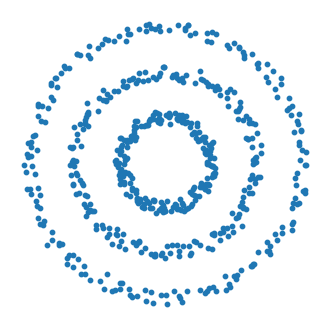

In [38]:
X = GeometryExamples.bullseye()

PlotUtils.plot_2d_scatter_with_different_colorings(X, point_size=10)

In [39]:
n_landmarks = 300
prime = 41

tc = ToroidalCoords(X, n_landmarks=n_landmarks, prime=prime)

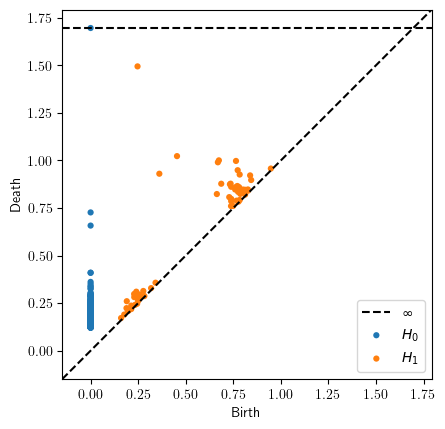

In [40]:
from persim import plot_diagrams
plot_diagrams(tc.dgms_)

number of faces:  7827


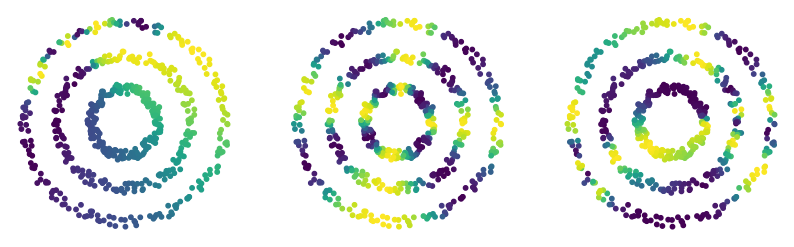

In [41]:

# run toroidal coordinates algorithm with 3 most persistent classes
perc = 0.1
cohomology_classes = [0,1,2]
toroidal_coords = tc.get_coordinates(perc = perc, cohomology_classes = cohomology_classes)

t_col1 = CircleMapUtils.levelset_coloring(toroidal_coords[0])
t_col2 = CircleMapUtils.levelset_coloring(toroidal_coords[1])
t_col3 = CircleMapUtils.levelset_coloring(toroidal_coords[2])

# the three circle-valued maps returned by toroidal coordinates
PlotUtils.plot_2d_scatter_with_different_colorings(X, [t_col1,t_col2,t_col3], point_size=10)

/opt/homebrew/Caskroom/miniforge/base/envs/dreimac-opt/lib/python3.9/site-packages/gudhi/persistence_graphical_tools.py:81: UserWarning: There are 60 intervals given as input, whereas max_intervals is set to 3.
  warnings.warn(


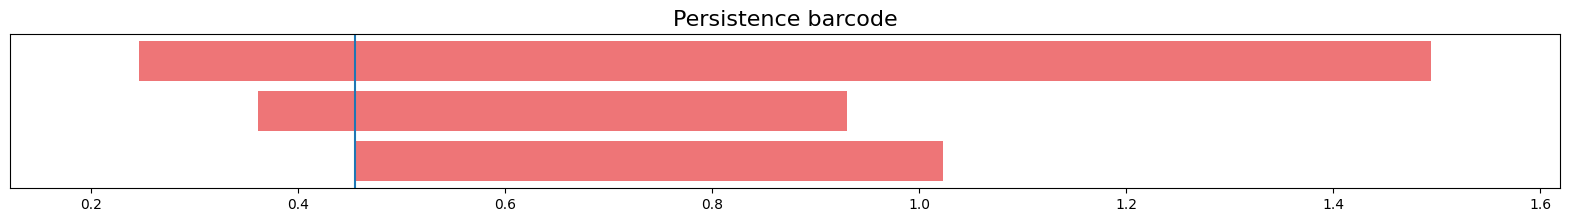

In [29]:
import gudhi
import matplotlib.pyplot as plt
pd = tc.dgms_[1]
fig = plt.figure(figsize=(20,2))
_ = gudhi.plot_persistence_barcode(pd, max_intervals=3, axes=fig.gca() )
plt.axvline(x=tc.threshold_)
plt.axvline(x=tc.coverage_, c="red")

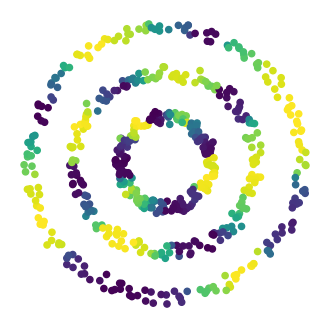

In [30]:
# the sum of the three maps returned by toroidal coordinates

t_sum = CircleMapUtils.linear_combination(
    np.array([toroidal_coords[0],toroidal_coords[1],toroidal_coords[2]]),
    np.array([1,1,1])
    )

t_col_sum = CircleMapUtils.levelset_coloring(t_sum)
PlotUtils.plot_2d_scatter_with_different_colorings(X, [t_col_sum], point_size=20)

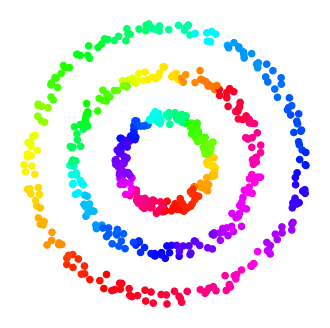

In [31]:
# plot same circle-valued map but with cyclic colormap
PlotUtils.plot_2d_scatter_with_different_colorings(X, [t_sum], point_size=20, cmap="hsv")

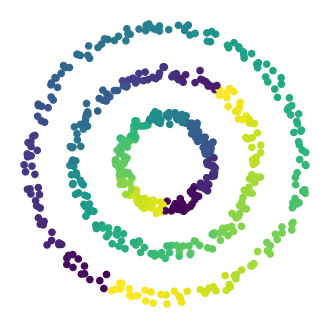

In [32]:
# plot same circle-valued map but with non-cyclic colormap
PlotUtils.plot_2d_scatter_with_different_colorings(X, [t_sum], point_size=20, cmap="viridis")

In [33]:
# run circular coordinates algorithm with 3 most persistent classes
cc = CircularCoords(X, n_landmarks=n_landmarks, prime=prime)
circular_coords1 = cc.get_coordinates(perc = perc, cohomology_class = cohomology_classes[0])
circular_coords2 = cc.get_coordinates(perc = perc, cohomology_class = cohomology_classes[1])
circular_coords3 = cc.get_coordinates(perc = perc, cohomology_class = cohomology_classes[2])
circular_coords = [circular_coords1, circular_coords2, circular_coords3]

number of faces:  276
number of faces:  648
number of faces:  1176


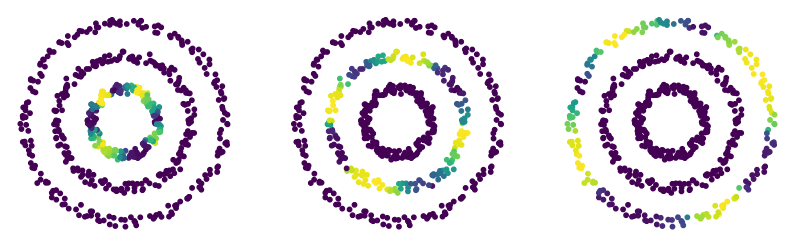

In [34]:
# the three circle-valued maps returned by circular coordinates
c_col1 = CircleMapUtils.levelset_coloring(circular_coords[0])
c_col2 = CircleMapUtils.levelset_coloring(circular_coords[1])
c_col3 = CircleMapUtils.levelset_coloring(circular_coords[2])

PlotUtils.plot_2d_scatter_with_different_colorings(X, [c_col1,c_col2,c_col3], point_size=10)

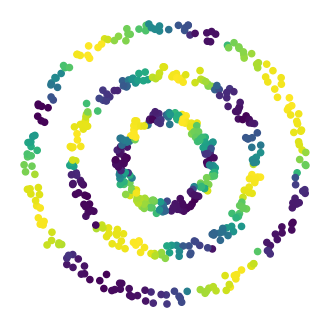

In [35]:
# the sum of the three circle-valued maps returned by circular coordinates

c_col_sum = CircleMapUtils.levelset_coloring((circular_coords[0] + circular_coords[1] + circular_coords[2]) % (2 * np.pi))
PlotUtils.plot_2d_scatter_with_different_colorings(X, [c_col_sum], point_size=20)

Note how the sum right above is not parametrizing the outermost circle, its parametrizing *twice* the circle in the middle, and one the innermost circle